In [118]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import label_binarize

In [119]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [120]:
# Import the data
test_data = pd.read_csv(r"drug_consumption_reformatted.csv")
clean_data = test_data.drop(columns=["AgeGroup","GenderName","AgeEducationEnded"])

In [121]:
test_data.info

<bound method DataFrame.info of         Id      Age AgeGroup   Gender GenderName  Education  \
0        1  0.49788    35-44  0.48246     Female   -0.05921   
1        2 -0.07854    25-34 -0.48246       Male    1.98437   
2        3  0.49788    35-44 -0.48246       Male   -0.05921   
3        4 -0.95197    18-24  0.48246     Female    1.16365   
4        5  0.49788    35-44  0.48246     Female    1.98437   
...    ...      ...      ...      ...        ...        ...   
1880  1884 -0.95197    18-24  0.48246     Female   -0.61113   
1881  1885 -0.95197    18-24 -0.48246       Male   -0.61113   
1882  1886 -0.07854    25-34  0.48246     Female    0.45468   
1883  1887 -0.95197    18-24  0.48246     Female   -0.61113   
1884  1888 -0.95197    18-24 -0.48246       Male   -0.61113   

      AgeEducationEnded  Country  Ethnicity   Nscore  ...   Oscore   Ascore  \
0                    22  0.96082    0.12600  0.31287  ... -0.58331 -0.91699   
1                    28  0.96082   -0.31685 -0.67825 

Text(0.5, 1, 'Feature Correlations')

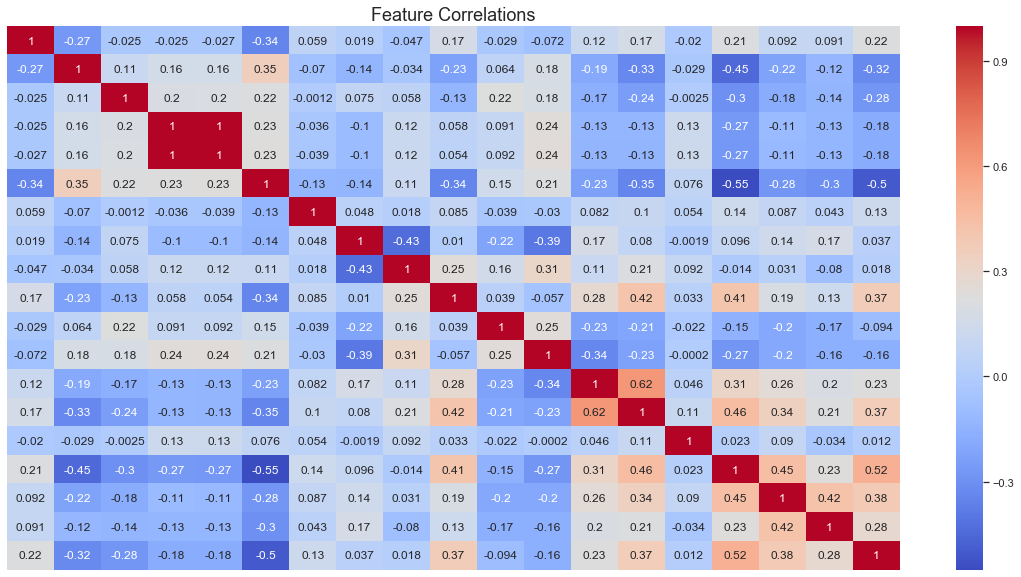

In [122]:
sns.set()
plt.figure(figsize=(20,10))
sns.heatmap(test_data.corr(), annot=True,  cmap='coolwarm', xticklabels=False,yticklabels=False)
plt.title("Feature Correlations", fontsize = 18)

<font color=Black> KNN <font>
    

MSE for  Alcohol with 5 nearest:  2.027
MSE for  Alcohol with 10 nearest:  1.864 

MSE for  Cannabis with 5 nearest:  3.507
MSE for  Cannabis with 10 nearest:  3.398 

MSE for  Cocaine with 5 nearest:  2.057
MSE for  Cocaine with 10 nearest:  1.943 

MSE for  Heroin with 5 nearest:  0.997
MSE for  Heroin with 10 nearest:  0.952 

MSE for  LSD with 5 nearest:  1.879
MSE for  LSD with 10 nearest:  1.899 



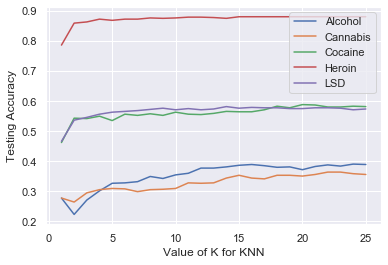

In [123]:
count = 0

for x in clean_data:
    if count > 12:
        x_data = clean_data.drop(columns=x)
        y_data = clean_data[[x]]
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=4)
        y_data = np.ravel(y_data)
        y_test = np.ravel(y_test)
        y_train = np.ravel(y_train)
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsRegressor(n_neighbors=5)
        knn.fit(x_train, y_train)
        predictions = knn.predict(x_test)
        mse = (((predictions - y_test) ** 2).sum()) / len(predictions)
        
        print("MSE for ", x, "with 5 nearest: ", round(mse,3))
        
        knn = KNeighborsRegressor(n_neighbors=10)
        knn.fit(x_train, y_train)
        predictions = knn.predict(x_test)
        mse = (((predictions - y_test) ** 2).sum()) / len(predictions)
        
        
        print("MSE for ", x, "with 10 nearest: ", round(mse,3),"\n")
        
 
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        
        # try K=1 through K=25 and record testing accuracy
        k_range = range(1, 26)
        
        # We can create Python dictionary using [] or dict()
        scores = []
        
        # We use a loop through the range 1 to 26
        # We append the scores in the dictionary
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(x_train, y_train)
            y_pred = knn.predict(x_test)
            scores.append(metrics.accuracy_score(y_test, y_pred))

        
        # plot the relationship between K and testing accuracy
        # plt.plot(x_axis, y_axis)
        plt.plot(k_range, scores)
        plt.xlabel('Value of K for KNN')
        plt.ylabel('Testing Accuracy')
        plt.legend(['Alcohol', 'Cannabis', 'Cocaine', 'Heroin','LSD'], loc='upper right')
    
    count += 1
    
    

<font color=Black> AUC for the KNN <font>

In [124]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(x_train)
X_train_std_sk = std_scaler.transform(x_train)
X_test_std_sk = std_scaler.transform(x_test)

In [125]:
y_score = y_pred

In [126]:
y_real_bi = label_binarize(y_test, classes=[0,1,2,3,4])

In [127]:
n_classes=5

In [128]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [129]:
from sklearn.metrics import roc_curve
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(
        y_real_bi[:, i], y_score[:, ])

In [130]:
from sklearn.metrics import roc_auc_score
auc = dict()
for i in range(n_classes):
    auc[i] = roc_auc_score(y_real_bi[:, i], y_score[:, ])
auc

{0: 0.46852678571428563,
 1: 0.49835476399648587,
 2: 0.5257142857142858,
 3: 0.5123493975903615,
 4: 0.5469679433693106}

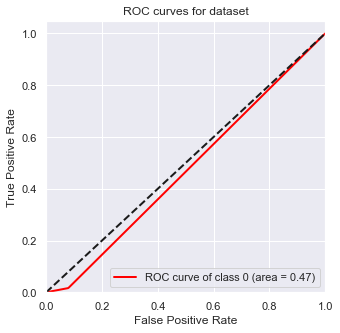

In [131]:
plt.figure(figsize=(5,5))
sns.set()
colors = ['red']
for i in range(1):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for dataset')
plt.legend(loc="lower right")
plt.show()

#### <font color=Black> RandomForest <font>

In [132]:
count=0
for x in clean_data:
    if count > 12:
        x_data = clean_data.drop(columns=x)
        y_data = clean_data[[x]]
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4)
        y_data = np.ravel(y_data)
        y_test = np.ravel(y_test)
        y_train = np.ravel(y_train)
        
        rf = RandomForestRegressor(n_estimators=50)
        rf.fit(x_train,y_train)
        rf_pred = rf.predict(x_test)
        mean_squared_error = metrics.mean_squared_error(y_test, rf_pred)
        r_squared_value = metrics.r2_score(y_test, rf_pred)
        
        print('MSE for ',x, 'with 100 trees:', round(mean_squared_error,3),)
        print('R2 for ', x , 'with 100 trees:', round(r_squared_value,3 ), "\n")
        
        
        rf = RandomForestRegressor(n_estimators=500)
        rf.fit(x_train,y_train)
        rf_pred = rf.predict(x_test)
        mean_squared_error = metrics.mean_squared_error(y_test, rf_pred)
        r_squared_value = metrics.r2_score(y_test, rf_pred)
        
        print('MSE for ',x, 'with 500 trees:', round(mean_squared_error,3),)
        print('R2 for ', x , 'with 500 trees:', round(r_squared_value,3 ), "\n")
    count+=1
    

MSE for  Alcohol with 100 trees: 1.847
R2 for  Alcohol with 100 trees: 0.044 

MSE for  Alcohol with 500 trees: 1.796
R2 for  Alcohol with 500 trees: 0.071 

MSE for  Cannabis with 100 trees: 2.41
R2 for  Cannabis with 100 trees: 0.543 

MSE for  Cannabis with 500 trees: 2.391
R2 for  Cannabis with 500 trees: 0.547 

MSE for  Cocaine with 100 trees: 1.442
R2 for  Cocaine with 100 trees: 0.382 

MSE for  Cocaine with 500 trees: 1.419
R2 for  Cocaine with 500 trees: 0.392 

MSE for  Heroin with 100 trees: 0.813
R2 for  Heroin with 100 trees: 0.225 

MSE for  Heroin with 500 trees: 0.786
R2 for  Heroin with 500 trees: 0.25 

MSE for  LSD with 100 trees: 1.511
R2 for  LSD with 100 trees: 0.37 

MSE for  LSD with 500 trees: 1.49
R2 for  LSD with 500 trees: 0.379 



<font color=Black> Evaluation for the RandomForest <font>

In [133]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(x_train)
X_train_std_sk = std_scaler.transform(x_train)
X_test_std_sk = std_scaler.transform(x_test)

In [134]:
y_score= rf_pred

In [135]:
y_real_bi = label_binarize(y_test, classes=[0,1,2,3,4])

In [136]:
n_classes=5

In [137]:
from sklearn.metrics import roc_curve
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(
        y_real_bi[:, i], y_score[:, ])

In [138]:
from sklearn.metrics import roc_auc_score
auc = dict()
for i in range(n_classes):
    auc[i] = roc_auc_score(y_real_bi[:, i], y_pred[:, ])
auc

{0: 0.49821682296106845,
 1: 0.5206800832755032,
 2: 0.4830409356725146,
 3: 0.4928728888004906,
 4: 0.5100815552679888}

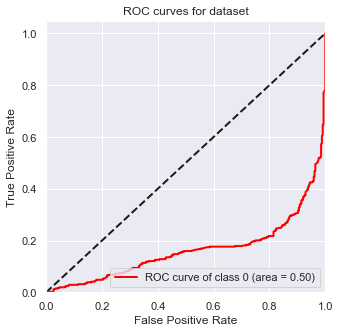

In [139]:
plt.figure(figsize=(5,5))
sns.set()
colors = ['red']
for i in range(1):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for dataset')
plt.legend(loc="lower right")
plt.show()

<font color=Black> LogisticRegression <font>



Alcohol


Confusion Matrix:
[[  0  22]
 [  1 543]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.96      1.00      0.98       544

    accuracy                           0.96       566
   macro avg       0.48      0.50      0.49       566
weighted avg       0.92      0.96      0.94       566



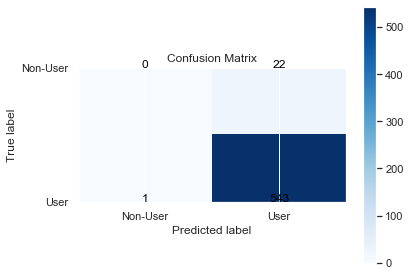

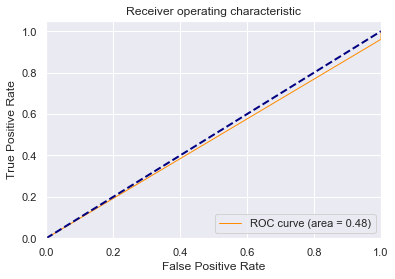



Cannabis


Confusion Matrix:
[[124  49]
 [ 48 345]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       173
           1       0.88      0.88      0.88       393

    accuracy                           0.83       566
   macro avg       0.80      0.80      0.80       566
weighted avg       0.83      0.83      0.83       566



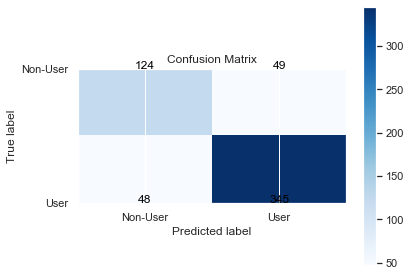

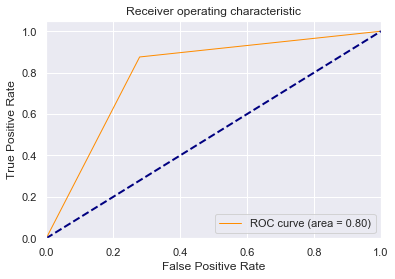



Cocaine


Confusion Matrix:
[[298  64]
 [112  92]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       362
           1       0.59      0.45      0.51       204

    accuracy                           0.69       566
   macro avg       0.66      0.64      0.64       566
weighted avg       0.68      0.69      0.68       566



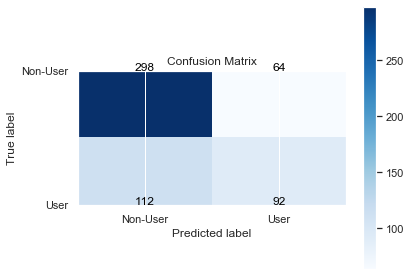

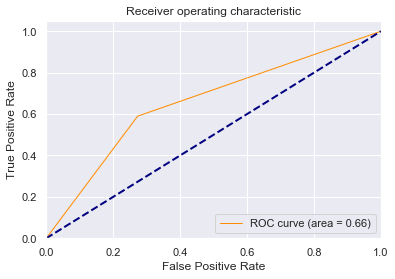



Heroin


Confusion Matrix:
[[489   7]
 [ 63   7]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       496
           1       0.50      0.10      0.17        70

    accuracy                           0.88       566
   macro avg       0.69      0.54      0.55       566
weighted avg       0.84      0.88      0.84       566



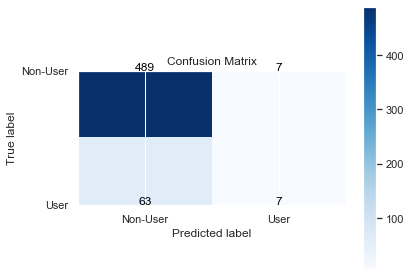

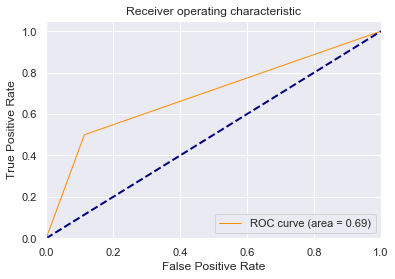



LSD


Confusion Matrix:
[[332  66]
 [ 75  93]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       398
           1       0.58      0.55      0.57       168

    accuracy                           0.75       566
   macro avg       0.70      0.69      0.70       566
weighted avg       0.75      0.75      0.75       566



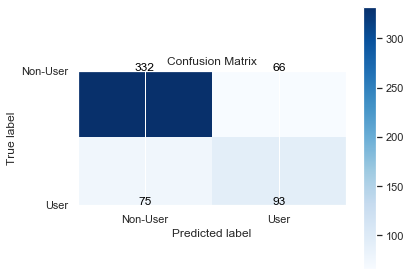

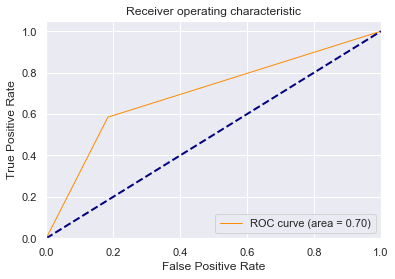

In [140]:
# import libraries
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from keras.models import Sequential

# sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve,auc
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

# load csv into dataframe
df = pd.read_csv('drug_consumption_reformatted.csv', encoding="latin-1")

# drop unused columns
df = df.drop(columns = ["AgeGroup", "GenderName", "AgeEducationEnded"])

# formulas
def plot_confusion_matrix(y_test, model_test):
    
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Non-User','User']
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks = np.arange(len(classNames))
    plt.xticks(ticks, classNames)
    plt.yticks(ticks, classNames)
    plt.tight_layout()
           
    fmt = '.0f'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "black")
    plt.tight_layout()
    plt.show()

def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_matrix(y_test, model_test)
    
def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

a = 0
while a < 5:
    # make copy of dataframe
    copy_df = df.copy()  
       
    
    # drugs to focus on
    columns = ['Alcohol', 'Cannabis', 'Cocaine', 'Heroin', 'LSD']
    cp = ['User_Alcohol', 'User_Cannabis', 'User_Cocaine', 'User_Heroin', 'User_LSD']
    # encode columns
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        
    for column in columns:
        le = LabelEncoder()
        copy_df[column] = le.fit_transform(copy_df[column])
        
    # new column for each drug 
    # shows if a person is using that drug or not
    for i in range(len(columns)):
        copy_df.loc[((copy_df[columns[i]]==0) | (copy_df[columns[i]]==1)),cp[i]] = 'Non-user'
        copy_df.loc[((copy_df[columns[i]]==2) | (copy_df[columns[i]]==3) | (copy_df[columns[i]]==4) | (copy_df[columns[i]]==5) | (copy_df[columns[i]]==6)),cp[i]] = 'User'
    
    
    # transform columns
    for column in copy_df.columns:
        le = LabelEncoder()
        copy_df[column] = le.fit_transform(copy_df[column])
        
    for column in df.columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
    
    yp = []
    for i in df[columns[i]]:
        if(i==0):
            yp.append([1,0,0,0,0,0,0])
        elif(i==1):
            yp.append([0,1,0,0,0,0,0])
        elif(i==2):
            yp.append([0,0,1,0,0,0,0])
        elif(i==3):
            yp.append([0,0,0,1,0,0,0])
        elif(i==4):
            yp.append([0,0,0,0,1,0,0])
        elif(i==5):
            yp.append([0,0,0,0,0,1,0])
        elif(i==6):
            yp.append([0,0,0,0,0,0,1])
    yp = np.array(yp)
    
    
    # ROC curve
    feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
           'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
    predicted_class_names = [columns[a]]
    
    X = df[feature_col_names].values
    y = df[predicted_class_names].values
    X_train, X_test, y_train, y_test = train_test_split(X, yp, test_size=0.30, random_state=42)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=42)
    
    # classifier
    classifier = Sequential()
    y_pred = classifier.predict(X_test)
    y_pred
    
    for i in range(len(y_pred)):
        maxs = max(y_pred[i])
        y_pred[i] = (y_pred[i]==maxs)
        
    svm = SVC(kernel="rbf", C=2,random_state=0)
    svm.fit(X_train1, y_train1.ravel())
    
    
    # setting up for ROC curve
    predicted_class_names = [cp[a]]
    
    X = copy_df[feature_col_names].values
    y = copy_df[predicted_class_names].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    
    clf = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    
    # show results
    print('\n')
    print(columns[a])
    report_performance(clf)
    roc_curves(clf)
    
    a += 1


In [141]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,

<font color=Black> Evaluation for the Logreg <font>



Logistic: ROC AUC=0.808


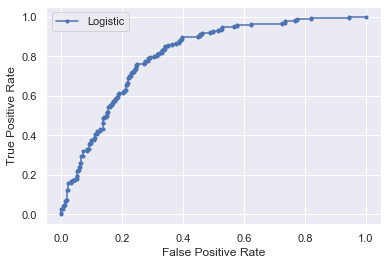

In [142]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = clf.predict_proba(X_test)

# keep probabilities for positive outcome only
lr_probs = lr_probs[:, 1]

# calculate
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize
print('\n')
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show legend
pyplot.legend()

# show plot
pyplot.show()

In [143]:
'''
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(x_train)
X_train_std_sk = std_scaler.transform(x_train)
X_test_std_sk = std_scaler.transform(x_test)
'''

'\nfrom sklearn import preprocessing\nstd_scaler = preprocessing.StandardScaler()\nstd_scaler.fit(x_train)\nX_train_std_sk = std_scaler.transform(x_train)\nX_test_std_sk = std_scaler.transform(x_test)\n'

In [144]:
# y_score = logreg.predict_proba(X_test_std_sk)

In [145]:
# from sklearn.preprocessing import label_binarize

In [146]:
# y_real_bi = label_binarize(y_test, classes=[0,1, 2, 3, 4])

In [147]:
# n_classes=5

In [148]:
'''
from sklearn.metrics import roc_curve
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(
        y_real_bi[:, i], y_score[:,i ])
'''

'\nfrom sklearn.metrics import roc_curve\nfpr = dict()\ntpr = dict()\nthresholds = dict()\nfor i in range(n_classes):\n    fpr[i], tpr[i], thresholds[i] = roc_curve(\n        y_real_bi[:, i], y_score[:,i ])\n'

In [149]:
'''
from sklearn.metrics import roc_auc_score
auc = dict()
for i in range(n_classes):
    auc[i] = roc_auc_score(y_real_bi[:, i], y_score[:, i])
auc
'''

'\nfrom sklearn.metrics import roc_auc_score\nauc = dict()\nfor i in range(n_classes):\n    auc[i] = roc_auc_score(y_real_bi[:, i], y_score[:, i])\nauc\n'

In [150]:
'''
plt.figure(figsize=(5,5))
sns.set()
colors = ['red']
n_classes=1
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0}(area = {1:0.2f})'.format(i, auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for dataset')
plt.legend(loc="lower right")
plt.show()
'''

'\nplt.figure(figsize=(5,5))\nsns.set()\ncolors = [\'red\']\nn_classes=1\nfor i in range(n_classes):\n    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,\n             label=\'ROC curve of class {0}(area = {1:0.2f})\'.format(i, auc[i]))\n\nplt.plot([0, 1], [0, 1], \'k--\', lw=2)\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'ROC curves for dataset\')\nplt.legend(loc="lower right")\nplt.show()\n'